In [3]:
import torch
from torch import nn

# Set random seed
torch.manual_seed(42)

# إنشاء البيانات (يجب أن يكون بعد استيراد torch)
weight = 0.7
bias = 0.3
start = 0    
end = 1 
step = 0.02

x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

# تقسيم البيانات
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Define model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

# Initialize model
model_0 = LinearRegressionModel()
print(list(model_0.parameters()))

# Example test prediction
with torch.inference_mode():
    y_preds = model_0(x_test)

# Loss function & optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

# Training loop
epochs = 1000  # زيادة عدد epochs لنتائج أفضل
for epoch in range(epochs):
    model_0.train()
    
    # Forward pass
    y_pred = model_0(x_train)
    loss = loss_fn(y_pred, y_train)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:  # طباعة كل 10 epochs
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# التحقق من النتائج النهائية
print(f"\nTrue weight: {weight}, Learned weight: {model_0.weights.item():.4f}")
print(f"True bias: {bias}, Learned bias: {model_0.bias.item():.4f}")

torch.Size([40, 1]) torch.Size([40, 1]) torch.Size([10, 1]) torch.Size([10, 1])
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
Epoch 0: Loss = 0.3129
Epoch 10: Loss = 0.1977
Epoch 20: Loss = 0.0891
Epoch 30: Loss = 0.0531
Epoch 40: Loss = 0.0454
Epoch 50: Loss = 0.0417
Epoch 60: Loss = 0.0382
Epoch 70: Loss = 0.0348
Epoch 80: Loss = 0.0313
Epoch 90: Loss = 0.0279
Epoch 100: Loss = 0.0245
Epoch 110: Loss = 0.0210
Epoch 120: Loss = 0.0176
Epoch 130: Loss = 0.0142
Epoch 140: Loss = 0.0107
Epoch 150: Loss = 0.0073
Epoch 160: Loss = 0.0039
Epoch 170: Loss = 0.0089
Epoch 180: Loss = 0.0089
Epoch 190: Loss = 0.0089
Epoch 200: Loss = 0.0089
Epoch 210: Loss = 0.0089
Epoch 220: Loss = 0.0089
Epoch 230: Loss = 0.0089
Epoch 240: Loss = 0.0089
Epoch 250: Loss = 0.0089
Epoch 260: Loss = 0.0089
Epoch 270: Loss = 0.0089
Epoch 280: Loss = 0.0089
Epoch 290: Loss = 0.0089
Epoch 300: Loss = 0.0089
Epoch 310: Loss = 0.0089
Epoch 320:

In [4]:
with torch.inference_mode():
    y_n=model_0(x_test)

In [2]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [19]:
import matplotlib.pyplot as plt
def plot_predictions(train_data=x_train,train_labels=y_train,test_data=x_test,test_labels=y_test,predections=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b",s=4,label="Train data")
    plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")
    if predections is not None:
        plt.scatter(test_data,predections,c="r",s=4,label="Predictions")   
    plt.legend()
    plt.show()

    


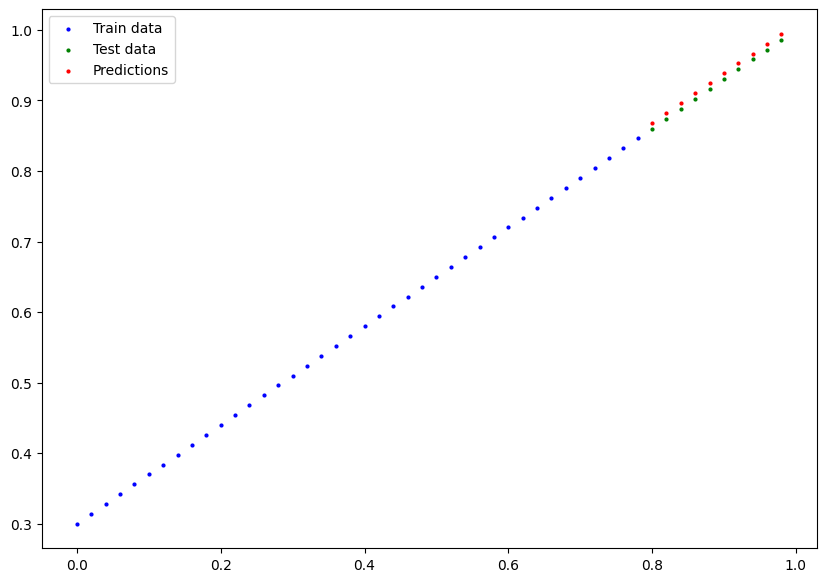

In [20]:
plot_predictions(predections=y_n)

In [22]:
model_0.eval()
with torch.inference_mode():
    test_pred=model_0(x_test)
    test_loss=loss_fn(test_pred,y_test)
    if epoch % 10 == 0:
        print(f"Test loss: {test_loss:.4f}")

In [27]:
from pathlib import Path 
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="01_pytorch_workflow_model_0.pth"
model_save_path=model_path/model_name
print(f"Saving model to: {model_save_path}")
torch.save(obj=model_0.state_dict(),f=model_save_path)

Saving model to: models\01_pytorch_workflow_model_0.pth


In [29]:
loaded_model=LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=model_save_path))
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [30]:
device="cuda" if torch.cuda.is_available() else "cpu"

weight=0.7
bias=0.3
start=0
end=1
step=0.02
x= torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias
x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [32]:
#split data
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]

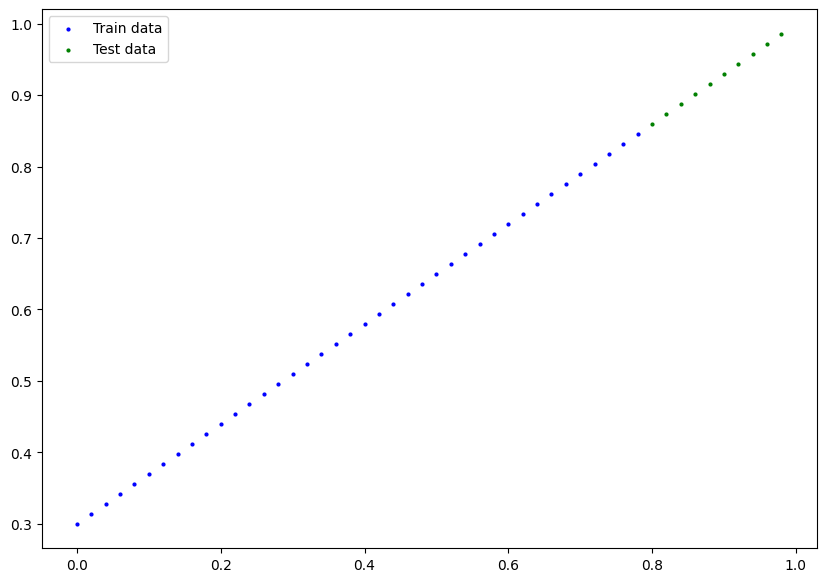

In [35]:
plot_predictions(x_train,y_train,x_test,y_test)

In [39]:
class LinearRegressionModelv2(nn.Module):
    def __init__ (self):
        super().__init__()
        self.liner_layer=nn.Linear(in_features=1,out_features=1)
        def forward(self,x: torch.Tensor)->torch.Tensor:
            return self.linear_layer(x)
torch.manual_seed(42)
model_1=LinearRegressionModelv2()
model_1.state_dict()


OrderedDict([('liner_layer.weight', tensor([[0.7645]])),
             ('liner_layer.bias', tensor([0.8300]))])

In [40]:
next(model_1.parameters())

Parameter containing:
tensor([[0.7645]], requires_grad=True)

In [42]:
model_1.to(device)

LinearRegressionModelv2(
  (liner_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [60]:
weight=0.7
bias=0.3
start=0
end=1
step=0.002
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]
class LinearRegressionModelv3(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer=nn.Linear(in_features=1,out_features=1)
    def forward(self,x:torch.Tensor)->torch.Tensor:
            return self.linear_layer(x)
model_02=LinearRegressionModelv3()
torch.manual_seed(42)
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_02.parameters(),lr=0.01 )
epochs=100
for epoch in range(epochs):
    model_02.train()
    y_pred=model_02(x_train)
    loss=loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
model_02.eval()
with torch.inference_mode():
    test_pred=model_02(x_test)
    test_loss=loss_fn(test_pred,y_test)

if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss}")   
print(f"\nTrue weight: {weight}, Learned weight: {model_02.linear_layer.weight.item():.4f}")
print(f"True bias: {bias}, Learned bias: {model_02.linear_layer.bias.item():.4f}")  
model_02.state_dict()



True weight: 0.7, Learned weight: 0.6657
True bias: 0.3, Learned bias: 0.3147


OrderedDict([('linear_layer.weight', tensor([[0.6657]])),
             ('linear_layer.bias', tensor([0.3147]))])

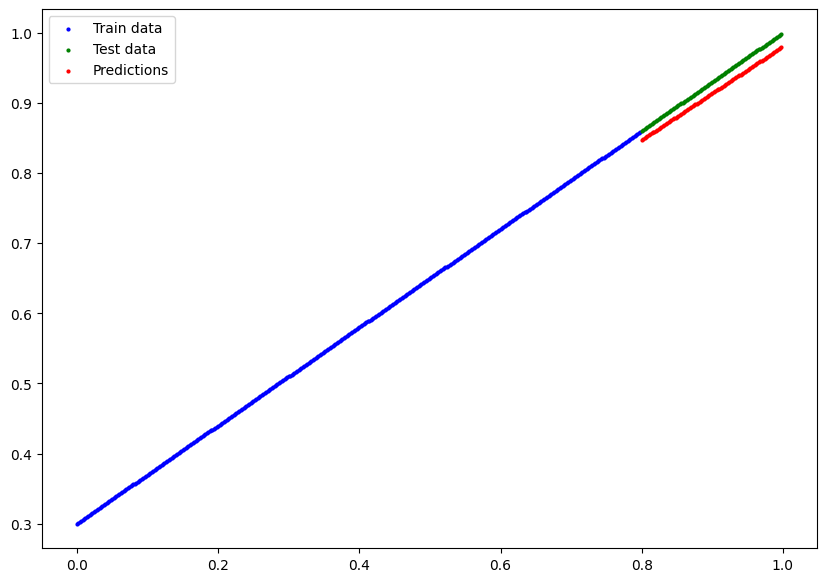

In [61]:
import matplotlib.pyplot as plt
def plot_predictions(train_data=x_train,train_labels=y_train,test_data=x_test,test_labels=y_test,predections=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b",s=4,label="Train data")
    plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")
    if predections is not None:
        plt.scatter(test_data,predections,c="r",s=4,label="Predictions")   
    plt.legend()
    plt.show()

plot_predictions(predections=test_pred.detach().cpu().numpy())



In [63]:
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)
model_name="01_pytorch_workflow_model_02.pth" 
model_save_path=model_path/model_name
print(f"Saving model to: {model_save_path}")  
torch.save(obj=model_02.state_dict(),f=model_save_path)

Saving model to: models\01_pytorch_workflow_model_02.pth


In [65]:
loaded_model=LinearRegressionModelv3()
loaded_model.load_state_dict(torch.load(f=model_save_path))
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6657]])),
             ('linear_layer.bias', tensor([0.3147]))])

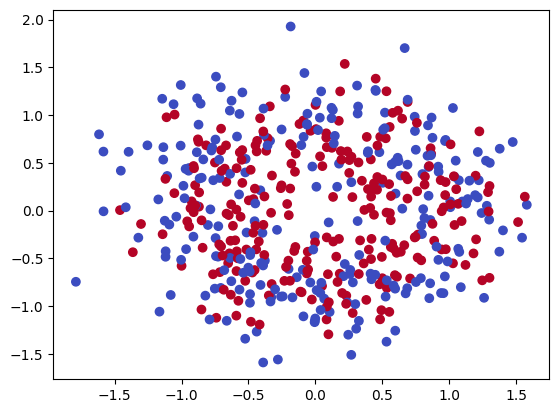

In [66]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=500, noise=0.3, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
plt.show()
